<a href="https://colab.research.google.com/github/HamedAjaj/Flower_Classification/blob/master/Flower_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.models import Sequential
import os
import cv2
from PIL import Image
import sys

DOWNLOAD AND ORGANIZE FLOWERS17 DATASET

In [2]:
#-----------------------------------------
# DOWNLOAD AND ORGANIZE FLOWERS17 DATASET
#-----------------------------------------
import os
import glob
import datetime
import tarfile
import urllib.request

def download_dataset(filename, url, work_dir):
  if not os.path.exists(filename):
    print("[INFO] Downloading flowers17 dataset....")
    filename, _ = urllib.request.urlretrieve(url + filename, filename)
    statinfo = os.stat(filename)
    print("[INFO] Succesfully downloaded " + filename + " " + str(statinfo.st_size) + " bytes.")
    untar(filename, work_dir)

def jpg_files(members):
  for tarinfo in members:
    if os.path.splitext(tarinfo.name)[1] == ".jpg":
      yield tarinfo

def untar(fname, path):
  tar = tarfile.open(fname)
  tar.extractall(path=path, members=jpg_files(tar))
  tar.close()
  print("[INFO] Dataset extracted successfully.")

#-------------------------
# MAIN FUNCTION
#-------------------------
if __name__ == '__main__':
  flowers17_url  = "http://www.robots.ox.ac.uk/~vgg/data/flowers/17/"
  flowers17_name = "17flowers.tgz"
  train_dir      = "dataset"

  if not os.path.exists(train_dir):
    os.makedirs(train_dir)

  download_dataset(flowers17_name, flowers17_url, train_dir)
  if os.path.exists(train_dir + "//jpg"):
    os.rename(train_dir + "//jpg", train_dir + "//train")


  # get the class label limit
  class_limit = 17

  # take all the images from the dataset
  image_paths = glob.glob(train_dir + "//train//*.jpg")

  # variables to keep track
  label = 0
  i = 0
  j = 80

  # flower17 class names
  class_names = ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
             "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
             "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
             "windflower", "pansy"]

  # loop over the class labels
  for x in range(1, class_limit+1):
    # create a folder for that class
    os.makedirs(train_dir + "//train//" + class_names[label])
    
    # get the current path
    cur_path = train_dir + "//train//" + class_names[label] + "//"
    
    # loop over the images in the dataset
    for index, image_path in enumerate(image_paths[i:j], start=1):
      original_path   = image_path
      image_path      = image_path.split("//")
      image_file_name = str(index) + ".jpg"
      os.rename(original_path, cur_path + image_file_name)
    
    i += 80
    j += 80
    label += 1

[INFO] Downloading flowers17 dataset....
[INFO] Succesfully downloaded 17flowers.tgz 60270631 bytes.
[INFO] Dataset extracted successfully.


Train path

In [3]:
train_path = "dataset//train//"

daffodil=os.listdir(train_path+"daffodil")
snowdrop=os.listdir(train_path+"snowdrop")
lilyvalley=os.listdir(train_path+"lilyvalley")
#bluebell=os.listdir(train_path+"bluebell")
bluebell=os.listdir("/content/dataset/train/bluebell")
crocus=os.listdir(train_path+"crocus")
iris=os.listdir(train_path+"iris")
tigerlily=os.listdir(train_path+"tigerlily")
tulip=os.listdir(train_path+"tulip")
fritillary=os.listdir(train_path+"fritillary")
sunflower=os.listdir(train_path+"sunflower")
daisy=os.listdir(train_path+"daisy")
coltsfoot=os.listdir(train_path+"coltsfoot")
dandelion=os.listdir(train_path+"dandelion")
cowslip=os.listdir(train_path+"cowslip")
buttercup=os.listdir(train_path+"buttercup")
windflower=os.listdir(train_path+"windflower")
pansy=os.listdir(train_path+"pansy")


In [4]:
species= ["daffodil", "snowdrop", "lilyvalley", "bluebell", "crocus",
             "iris", "tigerlily", "tulip", "fritillary", "sunflower", 
             "daisy", "coltsfoot", "dandelion", "cowslip", "buttercup",
             "windflower", "pansy"]


In [5]:
import numpy as np
print(np.array(bluebell).shape)
print(np.array(crocus).shape)

(80,)
(80,)


In [6]:
# to store each species of the flower in seperate array named after the species (no need to execute this)
print(type(daffodil[0]))
count=0
fixed_size       = tuple((150, 150))

X=[]

for file in daffodil:
    temp=cv2.imread(train_path+"daffodil/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in snowdrop:
    temp=cv2.imread(train_path+"snowdrop/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in lilyvalley:
    temp=cv2.imread(train_path+"lilyvalley/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in bluebell:
    temp=cv2.imread("/content/dataset/train/bluebell/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in crocus:
    temp=cv2.imread(train_path+"crocus/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))





for file in iris:
    temp=cv2.imread(train_path+"iris/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in tigerlily:
    temp=cv2.imread(train_path+"tigerlily/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in tulip:
    temp=cv2.imread(train_path+"tulip/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in fritillary:
    temp=cv2.imread(train_path+"fritillary/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in sunflower:
    temp=cv2.imread(train_path+"sunflower/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in daisy:
    temp=cv2.imread(train_path+"daisy/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in coltsfoot:
    temp=cv2.imread(train_path+"coltsfoot/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))



for file in dandelion:
    temp=cv2.imread(train_path+"dandelion/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in cowslip:
    temp=cv2.imread(train_path+"cowslip/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in buttercup:
    temp=cv2.imread(train_path+"buttercup/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))


for file in windflower:
    temp=cv2.imread(train_path+"windflower/"+str(file),1)      
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))

for file in pansy:
    temp=cv2.imread(train_path+"pansy/"+str(file),1)
    temp = cv2.resize(temp, fixed_size)
    X.append(temp)
print(len(X))





<class 'str'>
80
160
240
320
400
480
560
640
720
800
880
960
1040
1120
1200
1280
1360


In [7]:
#xonvert list to numpy array
Xb=np.array(X[200])
print(Xb.shape)

(150, 150, 3)


In [8]:
#xonvert list to numpy array
X=np.array(X)
print(X.shape)

(1360, 150, 150, 3)


In [9]:
#create output list Y 
Y=[]
for i in range(0,80):
    Y.append(0)
for i in range(80,160):
    Y.append(1)
for i in range(160,240):
    Y.append(2)
for i in range(240,320):
    Y.append(3)
for i in range(320,400):
    Y.append(4)
for i in range(400,480):
    Y.append(5)
for i in range(480,560):
    Y.append(6)
for i in range(560,640):
    Y.append(7)
for i in range(640,720):
    Y.append(8)
for i in range(720,800):
    Y.append(9)
for i in range(800,880):
    Y.append(10)
for i in range(880,960):
    Y.append(11)
for i in range(960,1040):
    Y.append(12)
for i in range(1040,1120):
    Y.append(13)
for i in range(1120,1200):
    Y.append(14)
for i in range(1200,1280):
    Y.append(15)
for i in range(1280,1360):
    Y.append(16)

     
Y=np.array(Y)
Y.shape


(1360,)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [11]:
X_train=np.array(X_train)
X_test=np.array(X_test)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#To find number of classes
k=np.unique(Y_train)
print(k)
K=len(k)
print(K)

(1088, 150, 150, 3)
(1088,)
(272, 150, 150, 3)
(272,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
17


In [12]:
X_train =X_train/255.0 

In [13]:
 X_test = X_test/255.0

In [14]:
#xonvert list to numpy array
Xy=np.array(X[1])
print(Xy.shape)

(150, 150, 3)


Text(0.5, 1.0, 'tulip')

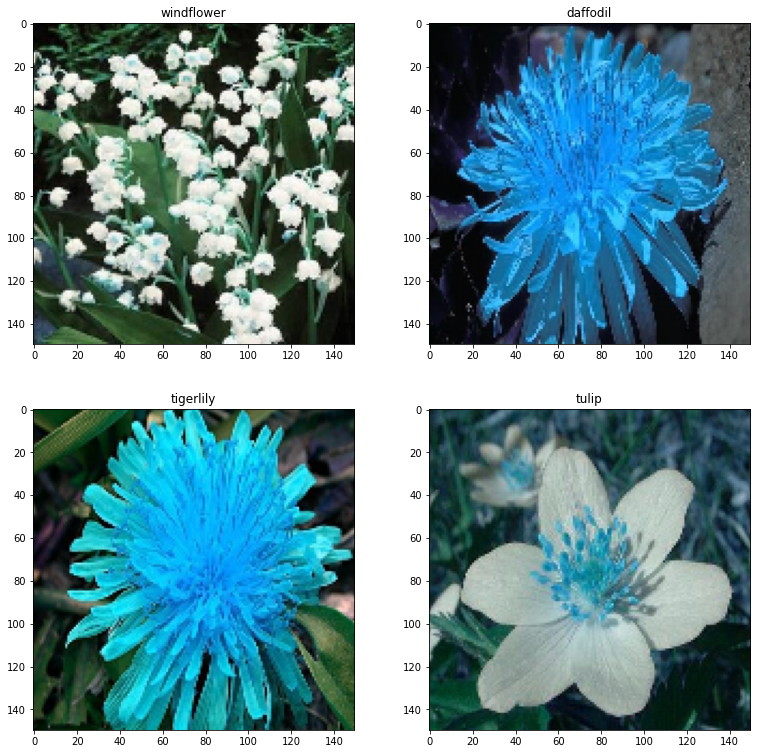

In [15]:

f,ax = plt.subplots(2,2,figsize=(13,13))
ax[0,0].imshow(X_train[0])
ax[0,0].set_title(str(species[(Y_train[0])]))
ax[0,1].imshow(X_train[50])
ax[0,1].set_title(str(species[(Y_train[50])]))
ax[1,0].imshow(X_train[100])
ax[1,0].set_title(str(species[(Y_train[100])]))
ax[1,1].imshow(X_train[106])
ax[1,1].set_title(str(species[(Y_train[106])]))

In [16]:
from tensorflow.keras.layers import MaxPooling2D 
from tensorflow import keras
from tensorflow.keras.layers import Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
batch_size=128
epochs=25

from tensorflow.keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=17,verbose=1,factor=0.1)#17

Data Augmentation

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, -10 to 10)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

Build a model

In [19]:
i=Input(shape=X_train[0].shape)
X=Conv2D(32,(3,3),strides=(1,1),activation='relu')(i)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(64,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Conv2D(96,(3,3),strides=(1,1),activation='relu')(X)
X=MaxPooling2D(pool_size=(2,2))(X)
X=Flatten()(X)
X=Dense(512,activation='relu')(X)
X=Dropout(0.2)(X)
X=Dense(17,activation='softmax')(X)
#X=Dropout(0.2)(X)
model=Model(i,X)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 96)        0     

Compile and Fit

In [21]:
model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
History = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/2
136/136 [==============================] - 51s 373ms/step - loss: 2.8369 - accuracy: 0.0533 - val_loss: 2.8366 - val_accuracy: 0.0294
Epoch 2/2
136/136 [==============================] - 50s 369ms/step - loss: 2.8334 - accuracy: 0.0634 - val_loss: 2.8388 - val_accuracy: 0.0294


In [22]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored

In [23]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: ignored

In [24]:
model.save('flowers_model2.h5') 

In [25]:
from tensorflow.keras.models import load_model

In [ ]:
model2 = load_model('flowers_model2.h5')

Prediction

In [ ]:
#To resize original image to standard format and saving it
img1 = Image.open('predictit.jpg')
imResize = img1.resize((150,150), Image.ANTIALIAS)
imResize.save('predictit.jpg', 'JPEG', quality=90)

(1, 150, 150, 3)

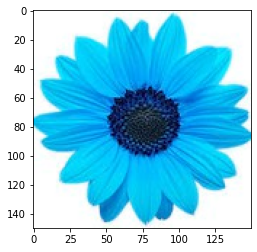

In [ ]:
predictimg=cv2.imread("predictit.jpg",1)
predictimg=np.array(predictimg)
plt.imshow(predictimg)
predictimg=predictimg/255.0

predictimg = np.expand_dims(predictimg, axis=0)
predictimg.shape

In [ ]:
predition=model.predict(predictimg)

predition=np.squeeze(predition)
print(predition)
predIndex=np.argmax(predition)

[0.05717757 0.05996137 0.06021854 0.05853121 0.06011835 0.05720736
 0.0576845  0.06097851 0.05869526 0.05919462 0.05854018 0.05965872
 0.05699877 0.06001653 0.05867545 0.05872746 0.05761558]


In [ ]:
print("The Species of given image is",species[predIndex])

In [ ]:

train_loss=History.history['loss']
val_loss=History.history['val_loss']
train_acc=History.history['accuracy']
val_acc=History.history['val_accuracy']
xc=range(20)

ValueError: ignored

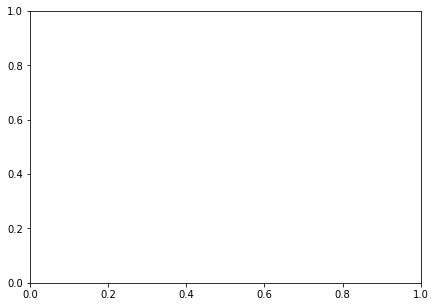

In [ ]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

ValueError: ignored

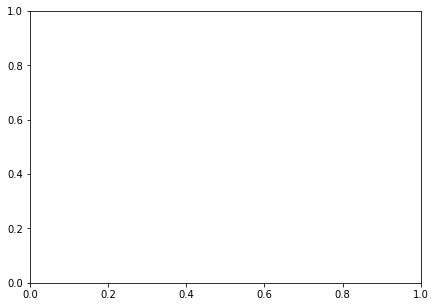

In [ ]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [ ]:
score = model.evaluate(X_test, Y_test,)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

In [ ]:

Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

In [ ]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cnf_matrix = (confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix')